### Install and Import Dependencies

In [1]:
! pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.9 MB 10.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.9 MB 11.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.4/2.9 MB 12.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.9/2.9 MB 11.0 MB/s eta 0:00:01
   ----------------------------- ---------- 2.2/2.9 MB 10.5 MB/s eta 0:00:01
   ------------------------------- -------- 2.3/2.9 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/313.0 kB ? eta -:--:--
   ---------------------------------------- 313.0/313.0 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB 6.5 MB/s eta 0:00:06
    --------------------------------------- 0.8/38.5 MB 8.4 MB/s eta 0:00:05
   - --------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

c:\Users\tanvi\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\tanvi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
reader= easyocr.Reader(['en'])
result=reader.readtext('surf.jpeg')
print(result)

[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9843141436576843)]


In [6]:
result[0][0][0]

[18, 18]

In [7]:
result[0][0][2]

[293, 145]

In [8]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

### Draw Results

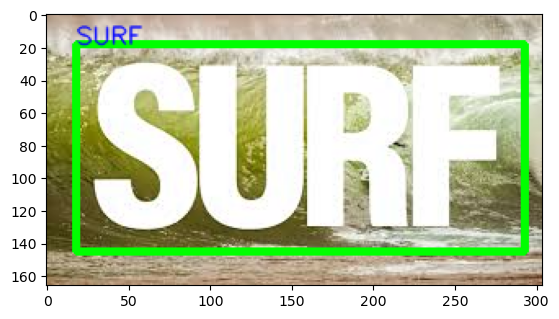

In [13]:
IMAGE_PATH='surf.jpeg'
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(0,0,255),1,cv2.LINE_AA)
plt.imshow(img)
plt.show()

### Handling Multiple Lines

[([[19, 181], [165, 181], [165, 201], [19, 201]], 'HEAD PROTECTION', 0.9750998873773454), ([[31, 201], [153, 201], [153, 219], [31, 219]], 'MUST BE WORN', 0.9763903612686898), ([[39, 219], [145, 219], [145, 237], [39, 237]], 'ON THIS SITE', 0.9744543679338054)]


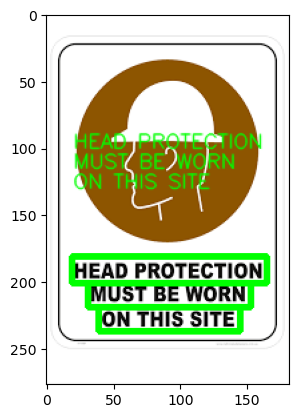

In [17]:
img = cv2.imread('sign.png')
reader= easyocr.Reader(['en'])
result=reader.readtext('sign.png')
print(result)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),1,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()